In [1]:
import pickle
from pathlib import Path
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

import child_poverty_iraq.data.load_data as ld
import child_poverty_iraq.utils.constants as c

In [2]:
import os
import gc

def adm2_for_country(cc='IRQ'):
    # Mosaiks
    filepath = f'../data/interim/{cc.upper()}_mosaiks_ADM2.csv'
    if os.path.exists(filepath):
        print(f"The file '{filepath}' exists.")
        irq_mosaiks_adm2 = pd.read_csv(filepath)
        print(irq_mosaiks_adm2.shape)
        
    else:
        mosaiks_adm2 = ld.get_mosaiks_adm2()
        mosaiks_adm2['countrycode'] = mosaiks_adm2['shapeID'].apply(lambda x: x[:3])
        irq_mosaiks_adm2 = mosaiks_adm2[mosaiks_adm2['countrycode']==cc]
        print(irq_mosaiks_adm2.shape)

        del mosaiks_adm2
        gc.collect()

        # Save
        irq_mosaiks_adm2.to_csv(filepath, index=False)

        


    # Geometry
    filepath_geom = f'../data/interim/{cc}_geom_mosaiks_ADM2.geojson'
    if os.path.exists(filepath_geom):
        irq_geom_mos_adm2 = gpd.read_file(filepath_geom)
        
    else:
        geom_mos_adm2 = ld.get_mosaiks_geom_adm2()
        irq_geom_mos_adm2 = geom_mos_adm2[geom_mos_adm2['shapeGroup']==cc]
        del geom_mos_adm2
        gc.collect()

        # A column has the same name as the index
        # Check if 'shapeID' is both an index level and a column label
        if 'shapeID' in irq_geom_mos_adm2.columns and 'shapeID' in irq_geom_mos_adm2.index.names:
            new_index_name = 'index'  # Choose a new name for the index
            irq_geom_mos_adm2.index.names = [new_index_name]
    
        # Save
        irq_geom_mos_adm2[['shapeID', 'geometry']].to_file(filepath_geom, driver="GeoJSON")


    print(irq_geom_mos_adm2.shape)

    
    # Merge
    mosaiks_adm2 = pd.merge(irq_mosaiks_adm2, irq_geom_mos_adm2, how='left', left_on='shapeID', right_on='shapeID')
    print(mosaiks_adm2.shape)

    # Plot
    mosaiks_adm2 = gpd.GeoDataFrame(mosaiks_adm2)
    mosaiks_adm2.plot()
    plt.show()

    return mosaiks_adm2

    

The file '../data/interim/IRQ_mosaiks_ADM2.csv' exists.
(101, 4002)
(101, 2)
(101, 4003)


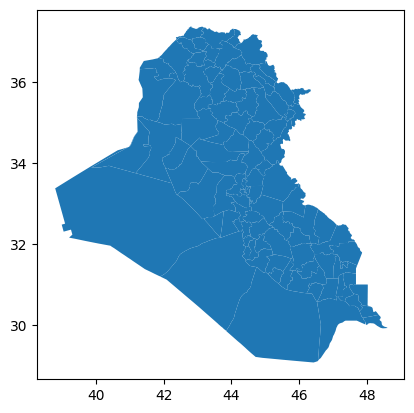

,shapeID,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_3992,X_3993,X_3994,X_3995,X_3996,X_3997,X_3998,X_3999,countrycode,geometry
0,IRQ-ADM2-3_0_0-B1,0.049259,0.177585,0.014997,0.269515,0.087675,0.090571,0.015690,0.034465,0.239613,...,0.099748,0.059812,0.044845,0.214694,0.329485,0.073572,0.123863,0.011518,IRQ,"POLYGON ((48.17378 30.41061, 48.18207 30.37387..."
1,IRQ-ADM2-3_0_0-B10,0.075824,0.291575,0.007750,0.457154,0.152653,0.113911,0.013029,0.014868,0.419081,...,0.056105,0.037808,0.029249,0.354595,0.322083,0.077898,0.228230,0.002565,IRQ,"POLYGON ((44.34662 34.71367, 44.36370 34.69533..."
2,IRQ-ADM2-3_0_0-B100,0.089037,0.292894,0.013404,0.387905,0.164048,0.162524,0.020947,0.028826,0.348532,...,0.087037,0.062209,0.050632,0.415094,0.431240,0.119835,0.266616,0.006501,IRQ,"POLYGON ((44.52068 34.55876, 44.51288 34.57558..."
3,IRQ-ADM2-3_0_0-B101,0.216832,0.504863,0.051657,0.546605,0.319308,0.422999,0.081735,0.089241,0.497906,...,0.199036,0.168291,0.153873,0.812617,0.854259,0.346871,0.500292,0.030633,IRQ,"POLYGON ((43.18114 37.35801, 43.16899 37.33299..."
4,IRQ-ADM2-3_0_0-B11,0.159978,0.433019,0.046702,0.372810,0.259741,0.324515,0.049759,0.083839,0.319488,...,0.262101,0.163764,0.141811,0.662488,0.996588,0.263815,0.426043,0.026065,IRQ,"POLYGON ((44.98663 32.27004, 44.95961 32.22121..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,IRQ-ADM2-3_0_0-B95,0.139297,0.402701,0.026928,0.548110,0.234146,0.237504,0.036022,0.049311,0.506712,...,0.120782,0.088210,0.076885,0.502426,0.499178,0.165069,0.329687,0.014502,IRQ,"POLYGON ((43.15971 36.77752, 43.13492 36.75328..."
97,IRQ-ADM2-3_0_0-B96,0.068069,0.194974,0.020548,0.162171,0.120138,0.167116,0.026299,0.063131,0.127871,...,0.178543,0.097274,0.057529,0.293931,0.566868,0.113184,0.169117,0.018140,IRQ,"POLYGON ((46.69277 30.99833, 46.71083 30.93912..."
98,IRQ-ADM2-3_0_0-B97,0.085280,0.319454,0.010134,0.532256,0.167899,0.123818,0.018064,0.021295,0.496538,...,0.054652,0.038356,0.025928,0.332374,0.270108,0.080485,0.222440,0.004594,IRQ,"POLYGON ((42.57258 36.02625, 42.53678 36.02625..."
99,IRQ-ADM2-3_0_0-B98,0.086676,0.273099,0.018216,0.277281,0.149300,0.226838,0.027043,0.047401,0.232656,...,0.158601,0.104171,0.084369,0.462148,0.621803,0.163739,0.299902,0.015594,IRQ,"POLYGON ((44.12050 34.83598, 44.09250 34.79578..."


In [6]:
adm2_for_country(cc='IRQ')

### Mosaiks

In [1]:
mosaiks_adm2 = ld.get_mosaiks_adm2()
print(mosaiks_adm2.shape)
mosaiks_adm2.head(2)

NameError: name 'ld' is not defined

In [3]:
mosaiks_adm2['countrycode'] = mosaiks_adm2['shapeID'].apply(lambda x: x[:3])

In [4]:
print(mosaiks_adm2['countrycode'].nunique())
mosaiks_adm2['countrycode'].unique()

170


array(['AFG', 'AGO', 'ALB', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BDI',
       'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BIH', 'BLR', 'BLZ', 'BOL',
       'BRA', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN',
       'CIV', 'CMR', 'COD', 'COG', 'COL', 'CPV', 'CRI', 'CUB', 'CYP',
       'CZE', 'DEU', 'DJI', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI',
       'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'FSM', 'GAB', 'GBR',
       'GEO', 'GHA', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GTM', 'GUY',
       'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ',
       'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ',
       'KHM', 'KIR', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LKA', 'LSO',
       'LTU', 'LUX', 'LVA', 'MAR', 'MCO', 'MDG', 'MEX', 'MKD', 'MLI',
       'MMR', 'MNG', 'MOZ', 'MRT', 'MWI', 'MYS', 'NAM', 'NER', 'NGA',
       'NIC', 'NLD', 'NOR', 'NPL', 'NRU', 'NZL', 'OMN', 'PAK', 'PAN',
       'PER', 'PHL', 'PNG', 'POL', 'PRK', 'PRT', 'PRY', 'QAT', 'ROU',
       'RUS', 'RWA',

In [6]:
irq_mosaiks_adm2 = mosaiks_adm2[mosaiks_adm2['countrycode']=='IRQ']
irq_mosaiks_adm2.shape

(101, 4002)

In [7]:
irq_mosaiks_adm2.to_csv('../data/interim/IRQ_mosaiks_ADM2.csv', index=False)

In [3]:
irq_mosaiks_adm2 = pd.read_csv('../data/interim/IRQ_mosaiks_ADM2.csv')

### Geom mosaiks

In [4]:
geom_mos_adm2 = ld.get_mosaiks_geom_adm2()
print(geom_mos_adm2.shape)
geom_mos_adm2.head(2)

The file '../data/external/geoBoundariesCGAZ_ADM2.topojson' exists.
(113074, 10)


,id,shapeName,shapeISO,shapeID,shapeGroup,shapeType,ADM1_shapeID,ADM0_shapeID,ADMHIERARCHY,geometry
0,NaN,Niquero,None,CUB-ADM2-3_0_0-B1,CUB,ADM2,CUB-ADM1-3_0_0-B8,CUB-ADM0-3_0_0-B1,CUB-ADM2-3_0_0-B1|CUB-ADM1-3_0_0-B8|CUB-ADM0-3...,"POLYGON ((-77.50583 20.10154, -77.50501 20.098..."
1,NaN,Nuevitas,None,CUB-ADM2-3_0_0-B2,CUB,ADM2,CUB-ADM1-3_0_0-B5,CUB-ADM0-3_0_0-B1,CUB-ADM2-3_0_0-B2|CUB-ADM1-3_0_0-B5|CUB-ADM0-3...,"MULTIPOLYGON (((-77.49072 21.42589, -77.46043 ..."


In [5]:
irq_geom_mos_adm2 = geom_mos_adm2[geom_mos_adm2['shapeGroup']=='IRQ']
irq_geom_mos_adm2.shape

(101, 10)

In [6]:
del geom_mos_adm2

### Merge

In [9]:
mosaiks_adm2 = pd.merge(irq_mosaiks_adm2, irq_geom_mos_adm2, how='left', left_on='shapeID', right_on='shapeID')
print(mosaiks_adm2.shape)
mosaiks_adm2.head(2)

(101, 4011)


,shapeID,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,countrycode,id,shapeName,shapeISO,shapeGroup,shapeType,ADM1_shapeID,ADM0_shapeID,ADMHIERARCHY,geometry
0,IRQ-ADM2-3_0_0-B1,0.049259,0.177585,0.014997,0.269515,0.087675,0.090571,0.015690,0.034465,0.239613,...,IRQ,NaN,Abu Al-Khaseeb,None,IRQ,ADM2,IRQ-ADM1-3_0_0-B12,IRQ-ADM0-3_0_0-B1,IRQ-ADM2-3_0_0-B1|IRQ-ADM1-3_0_0-B12|IRQ-ADM0-...,"POLYGON ((48.17378 30.41061, 48.18207 30.37387..."
1,IRQ-ADM2-3_0_0-B10,0.075824,0.291575,0.007750,0.457154,0.152653,0.113911,0.013029,0.014868,0.419081,...,IRQ,NaN,Al-Daur,None,IRQ,ADM2,IRQ-ADM1-3_0_0-B9,IRQ-ADM0-3_0_0-B1,IRQ-ADM2-3_0_0-B10|IRQ-ADM1-3_0_0-B9|IRQ-ADM0-...,"POLYGON ((44.34662 34.71367, 44.36370 34.69533..."


In [13]:
mosaiks_adm2 = gpd.GeoDataFrame(mosaiks_adm2)

In [14]:
type(mosaiks_adm2)

geopandas.geodataframe.GeoDataFrame

<Axes: >

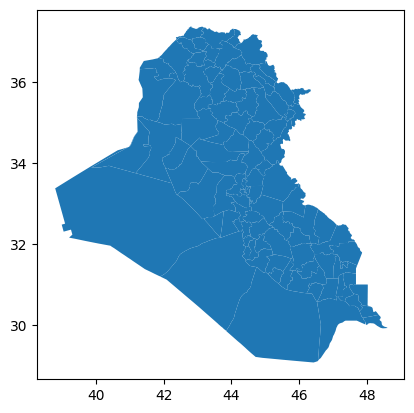

In [15]:
mosaiks_adm2.plot()

In [16]:
mosaiks_adm2

,shapeID,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,countrycode,id,shapeName,shapeISO,shapeGroup,shapeType,ADM1_shapeID,ADM0_shapeID,ADMHIERARCHY,geometry
0,IRQ-ADM2-3_0_0-B1,0.049259,0.177585,0.014997,0.269515,0.087675,0.090571,0.015690,0.034465,0.239613,...,IRQ,NaN,Abu Al-Khaseeb,None,IRQ,ADM2,IRQ-ADM1-3_0_0-B12,IRQ-ADM0-3_0_0-B1,IRQ-ADM2-3_0_0-B1|IRQ-ADM1-3_0_0-B12|IRQ-ADM0-...,"POLYGON ((48.17378 30.41061, 48.18207 30.37387..."
1,IRQ-ADM2-3_0_0-B10,0.075824,0.291575,0.007750,0.457154,0.152653,0.113911,0.013029,0.014868,0.419081,...,IRQ,NaN,Al-Daur,None,IRQ,ADM2,IRQ-ADM1-3_0_0-B9,IRQ-ADM0-3_0_0-B1,IRQ-ADM2-3_0_0-B10|IRQ-ADM1-3_0_0-B9|IRQ-ADM0-...,"POLYGON ((44.34662 34.71367, 44.36370 34.69533..."
2,IRQ-ADM2-3_0_0-B100,0.089037,0.292894,0.013404,0.387905,0.164048,0.162524,0.020947,0.028826,0.348532,...,IRQ,NaN,Tooz Khurmato,None,IRQ,ADM2,IRQ-ADM1-3_0_0-B9,IRQ-ADM0-3_0_0-B1,IRQ-ADM2-3_0_0-B100|IRQ-ADM1-3_0_0-B9|IRQ-ADM0...,"POLYGON ((44.52068 34.55876, 44.51288 34.57558..."
3,IRQ-ADM2-3_0_0-B101,0.216832,0.504863,0.051657,0.546605,0.319308,0.422999,0.081735,0.089241,0.497906,...,IRQ,NaN,Zakho,None,IRQ,ADM2,IRQ-ADM1-3_0_0-B1,IRQ-ADM0-3_0_0-B1,IRQ-ADM2-3_0_0-B101|IRQ-ADM1-3_0_0-B1|IRQ-ADM0...,"POLYGON ((43.18114 37.35801, 43.16899 37.33299..."
4,IRQ-ADM2-3_0_0-B11,0.159978,0.433019,0.046702,0.372810,0.259741,0.324515,0.049759,0.083839,0.319488,...,IRQ,NaN,Al-Diwaniya,None,IRQ,ADM2,IRQ-ADM1-3_0_0-B10,IRQ-ADM0-3_0_0-B1,IRQ-ADM2-3_0_0-B11|IRQ-ADM1-3_0_0-B10|IRQ-ADM0...,"POLYGON ((44.98663 32.27004, 44.95961 32.22121..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,IRQ-ADM2-3_0_0-B95,0.139297,0.402701,0.026928,0.548110,0.234146,0.237504,0.036022,0.049311,0.506712,...,IRQ,NaN,Sumail,None,IRQ,ADM2,IRQ-ADM1-3_0_0-B1,IRQ-ADM0-3_0_0-B1,IRQ-ADM2-3_0_0-B95|IRQ-ADM1-3_0_0-B1|IRQ-ADM0-...,"POLYGON ((43.15971 36.77752, 43.13492 36.75328..."
97,IRQ-ADM2-3_0_0-B96,0.068069,0.194974,0.020548,0.162171,0.120138,0.167116,0.026299,0.063131,0.127871,...,IRQ,NaN,Suq Al-Shoyokh,None,IRQ,ADM2,IRQ-ADM1-3_0_0-B13,IRQ-ADM0-3_0_0-B1,IRQ-ADM2-3_0_0-B96|IRQ-ADM1-3_0_0-B13|IRQ-ADM0...,"POLYGON ((46.69277 30.99833, 46.71083 30.93912..."
98,IRQ-ADM2-3_0_0-B97,0.085280,0.319454,0.010134,0.532256,0.167899,0.123818,0.018064,0.021295,0.496538,...,IRQ,NaN,Telafar,None,IRQ,ADM2,IRQ-ADM1-3_0_0-B4,IRQ-ADM0-3_0_0-B1,IRQ-ADM2-3_0_0-B97|IRQ-ADM1-3_0_0-B4|IRQ-ADM0-...,"POLYGON ((42.57258 36.02625, 42.53678 36.02625..."
99,IRQ-ADM2-3_0_0-B98,0.086676,0.273099,0.018216,0.277281,0.149300,0.226838,0.027043,0.047401,0.232656,...,IRQ,NaN,Tikrit,None,IRQ,ADM2,IRQ-ADM1-3_0_0-B9,IRQ-ADM0-3_0_0-B1,IRQ-ADM2-3_0_0-B98|IRQ-ADM1-3_0_0-B9|IRQ-ADM0-...,"POLYGON ((44.12050 34.83598, 44.09250 34.79578..."


In [23]:
output_path = '../data/interim/IRQ_geom_mosaiks_ADM2.geojson'
mosaiks_adm2[['shapeID', 'geometry']].to_file(output_path, driver="GeoJSON")

In [25]:
tmp = gpd.read_file(output_path)

In [26]:
tmp

,shapeID,geometry
0,IRQ-ADM2-3_0_0-B1,"POLYGON ((48.17378 30.41061, 48.18207 30.37387..."
1,IRQ-ADM2-3_0_0-B10,"POLYGON ((44.34662 34.71367, 44.36370 34.69533..."
2,IRQ-ADM2-3_0_0-B100,"POLYGON ((44.52068 34.55876, 44.51288 34.57558..."
3,IRQ-ADM2-3_0_0-B101,"POLYGON ((43.18114 37.35801, 43.16899 37.33299..."
4,IRQ-ADM2-3_0_0-B11,"POLYGON ((44.98663 32.27004, 44.95961 32.22121..."
...,...,...
96,IRQ-ADM2-3_0_0-B95,"POLYGON ((43.15971 36.77752, 43.13492 36.75328..."
97,IRQ-ADM2-3_0_0-B96,"POLYGON ((46.69277 30.99833, 46.71083 30.93912..."
98,IRQ-ADM2-3_0_0-B97,"POLYGON ((42.57258 36.02625, 42.53678 36.02625..."
99,IRQ-ADM2-3_0_0-B98,"POLYGON ((44.12050 34.83598, 44.09250 34.79578..."
